### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of points (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use a cloud GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [6]:
nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1 and HA2):

In [ ]:
NAME1 = ""
NAME2 = ""
GROUP = ""

### Check Python version

In [ ]:
from platform import python_version_tuple

assert (
    python_version_tuple()[:2] == ("3", "11")
), "You are not running Python 3.11. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [2]:
import os

nb_dirname = os.path.abspath("")
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in [
    "IHA1",
    "IHA2",
    "HA1",
    "HA2",
], "[ERROR] The notebook appears to have been moved from its original directory"

### Verify correct nb_fname

In [ ]:
from IPython.display import HTML, display

try:
    display(
        HTML(
            r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(
                nb_fname=nb_fname
            )
        )
    )
except NameError:
    assert False, "Make sure to fill in the nb_fname variable above!"

### Verify that your notebook is up-to-date and not corrupted in any way

In [7]:
import sys

sys.path.append("..")
from ha_utils import check_notebook_uptodate_and_not_corrupted

check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/dml-cth/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](https://upload.wikimedia.org/wikipedia/en/4/46/Pokemon_Go.png)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a different and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall). To download the dataset you will need a Kaggle account. This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall).

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's longitude and latitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration

Feel free to temporarily add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The Python docs](https://docs.python.org/3/), [PyTorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

To pass this assignment, your solutions should pass all tests (`assert`-statements). Note that the tests shown to you are not exhaustive, and additional hidden tests exist for some of the tasks. Further, similar to IHA1, this notebook contains some questions where we ask you to reflect upon some results. These questions will not be graded in detail, but we still expect you to answer them.

## 0. Imports

Import any necessary modules here.

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.basemap import Basemap
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from typing import Callable, Union
import torch.nn as nn
import torch.utils
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.colors as mcolors
from sklearn.metrics import confusion_matrix

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three Pokémon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, either use [this link](https://www.kaggle.com/semioniy/predictemall) to do so (and place the file in the same folder as this notebook), or simply run the cell below. You might have to [create a new API token](https://www.kaggle.com/settings/account) before the commands work.

In [8]:
!kaggle datasets download -d semioniy/predictemall
!unzip -u predictemall.zip
!rm -rf predictemall.zip 300k_arff 300k.arff 300k_csv

"kaggle" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [2]:
# TODO: load the dataset using pandas to a dataframe called df
df = pd.read_csv('300k.csv')

C:\Users\danie\AppData\Local\Temp\ipykernel_14320\2077059538.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('300k.csv')


In [3]:
assert df.shape == (
    296021,
    208,
), f"Dataframe has not the right shape. {df.shape} != (296021, 208)"
assert isinstance(df, pd.DataFrame), f"df is not a dataframe. Was {type(df)}"

Modify `df` to only have the columns `latitude`, `longitude`, and `class`.

In [4]:
print(df.columns)
df = df[["latitude","longitude","class"]]

Index(['pokemonId', 'latitude', 'longitude', 'appearedLocalTime', '_id',
       'cellId_90m', 'cellId_180m', 'cellId_370m', 'cellId_730m',
       'cellId_1460m',
       ...
       'cooc_143', 'cooc_144', 'cooc_145', 'cooc_146', 'cooc_147', 'cooc_148',
       'cooc_149', 'cooc_150', 'cooc_151', 'class'],
      dtype='object', length=208)


In [5]:
assert len(df.columns) == 3, "There should be 3 columns"
assert len(df.shape) == 2, "The dataframe should be 2 dimensional"
assert df.shape == (296021, 3), "Wrong shape of the dataframe"
assert "latitude" in df.columns, "latitude column is missing"
assert "longitude" in df.columns, "longitude column is missing"
assert "class" in df.columns, "class column is missing"

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For your convenience, we provide the dictionary `name_dict` to convert between ids and names (we'll do this soon).

In [258]:
from utils import name_dict

In [259]:
# example usage (you can index either by name or id)
print(name_dict["Gengar"])
print(name_dict[94])

94
Gengar


In [260]:
# for convenience, let's add a new column to the dataframe with the name of the pokemon
df["name"] = df["class"].apply(lambda x: name_dict[x])
print(df.head())

    latitude   longitude  class    name
0  20.525745  -97.460829     16  Pidgey
1  20.523695  -97.461167    133   Eevee
2  38.903590  -77.199780     16  Pidgey
3  47.665903 -122.312561     13  Weedle
4  47.666454 -122.311628    133   Eevee


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://www.pokemon.com/static-assets/content-assets/cms2/img/pokedex/full/128.png></td>
  </tr>
</table>



Filter the dataset to contain only these three types of pokemon and save it in the DataFrame `filtered_df`.

In [261]:
filter_values = ['Diglett', 'Seel', 'Tauros']

# Filter the DataFrame
filtered_df = df[df['name'].isin(filter_values)]

print(
    f"We have {len(filtered_df)} instances of Diglett, Seel, and Tauros in the dataset."
)

We have 2083 instances of Diglett, Seel, and Tauros in the dataset.


In [262]:
assert len(np.unique(filtered_df["class"])) == 3, "There should be 3 unique classes."
assert filtered_df.shape == (
    2083,
    4,
), "The shape of the filtered dataframe is incorrect."

In an earlier cell, you could see that the dataset has 208 features per pokemon sighting (`df.shape == (296021, 208)`). Why do we only use the `longitude` and `latitude` features and not all the features? 

**Your answer:** There are many features related to different conditions, like weather, country, time of the day etc. However, in the problem presented, as pokemon hunter I only care about the maximum likelihood location to travel. Therefore, having latitude and longitude as features aims for the problem we want to solve.

## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a bar chart of the number of occurrences of each class.

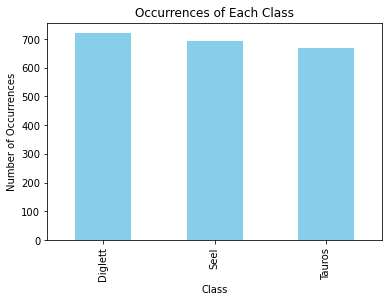

In [11]:
# Count the occurrences of each value
value_counts = filtered_df['name'].value_counts()

# Plot the bar chart
value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Each Class')

# Show the plot
plt.show()

Is the dataset balanced? Why/why not? Why is this important?

**Your answer:** Yes, we can consider it balanced as every pokemon has roughly a 33% of appearance. This is import when training models in ML because if not one can introduce biases and make the model more likely to predict the majority class. If the dataset wass imbalanced one could use stratified sampling for example.

Plot a scatter plot where the first dimension is longitude, the second is latitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

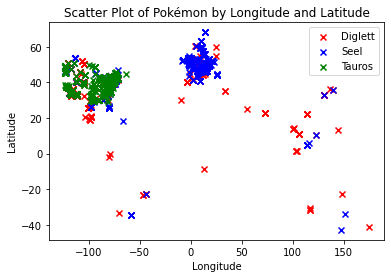

In [263]:
# Define a color map for each Pokémon
color_map = {'Diglett': 'red', 'Seel': 'blue', 'Tauros': 'green'}

# Create the plot for each Pokémon separately, adding labels for the legend
for pokemon in filter_values:
    subset = filtered_df[filtered_df['name'] == pokemon]
    plt.scatter(
        subset['longitude'],    # x-axis
        subset['latitude'],     # y-axis
        c=color_map[pokemon],      # Color based on Pokémon name
        marker='x',             # Use 'x' as the marker
        label=pokemon           # Add label for the legend
    )

# Label the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Pokémon by Longitude and Latitude')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

Is there any other visualization you think would be useful? If so, insert them here.

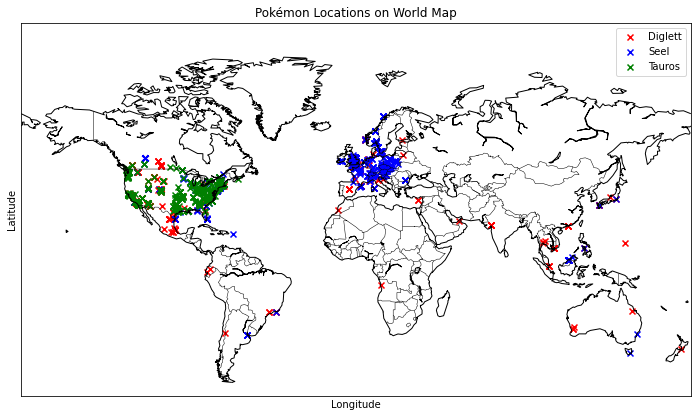

In [264]:
# Create the world map using Basemap
plt.figure(figsize=(12, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()

# Create the plot for each Pokémon separately, converting coordinates to map projection
for pokemon in filter_values:
    subset = filtered_df[filtered_df['name'] == pokemon]
    # Convert latitude and longitude to map coordinates
    x, y = m(subset['longitude'].values, subset['latitude'].values)
    
    plt.scatter(
        x, y,                  # Plot using map coordinates
        c=color_map[pokemon],   # Color based on Pokémon name
        marker='x',             # Use 'x' as the marker
        label=pokemon           # Add label for the legend
    )

# Label the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pokémon Locations on World Map')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** It looks an easy problem to solve approximately but a hard problem to solve exactly. With this I mean that one could say that Tauros mainly appear in the US, Seels appear in Europe and Digletts are spreaded all over the world, with a decent concentration around Mexico. However, if one wants an accurate model is going to be very hard because the classes are not linearly seprable and some times classes overlap, meaning that there is randomness of some other features that one should take into account.

Which accuracy do you expect to achieve?

**Your answer:** A priori, 66% accuracy seems easy to obtain, just with a straight line separating blue and green. Therefore, when using NN I would expect to be able to obtain something greater.

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. We will use some PyTorch utilities to help us with this task.

Start by creating the input and output vectors, `x` and `y`. The input should be latitude and longitude, and the output should be the class of the pokemon. Note that you cannot use the class names directly, as they are strings. You need to introduce some mapping to convert them to integers (0, 1, and 2) or one-hot vectors.

In [265]:
x=filtered_df[["latitude","longitude"]]
y=filtered_df[["name"]]

re_map = {'Diglett': 0, 'Seel': 1, 'Tauros': 2}

y = y["name"].apply(lambda y: re_map[y])

#Convert to numpy
x = x.to_numpy(dtype=np.float32)
y = y.to_numpy()

print(f"Shape of input data: {x.shape}")
print(f"Shape of labels: {y.shape}")

Shape of input data: (2083, 2)
Shape of labels: (2083,)


In [266]:
assert isinstance(x, np.ndarray), "x should be a numpy array"
assert isinstance(y, np.ndarray), "y should be a numpy array"

assert x.shape[0] == y.shape[0], "x and y should have the same number of samples"
assert x.shape[-1] == 2, "x should have 2 features"
assert x.dtype == np.float32, "x should be of type float32"
if y.shape[-1] == 3:  # one-hot encoded
    assert y.max() == 1, "one-hot encoded y, at least one entry should be 1"
    assert y.min() == 0, "one-hot encoded y, at least one entry should be 0"
    assert y.sum(axis=1).all() == 1
else:  # label encoded
    assert y.max() == 2, "label encoded y, should have a max value of 2"
    assert y.min() == 0, "label encoded y, should have a min value of 0"

Separate your data into training (55%), validation (25%) and test sets (20%) and save them as `dataset_train`, `dataset_val`, `dataset_test`. If you wish to apply any transformation to the dataset, do it here as well. 

Further, create a class, PokemonDataset, inheriting from PyTorch [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and use this for storing the data. In other words, `dataset_train`, `dataset_val`, `dataset_test` should have type PokemonDataset. You will need to implement a `__getitem__`, `__len__` and `__init__` method. Although perhaps a bit overkill for this assignment, it is a good practice for handling datasets in PyTorch.

Last, instantiate a [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for each dataset, i.e., `loader_train`, `loader_val`, `loader_test`. This will fetch samples from the datasets and combine them into batches. Remember to select a suitable batch size.

In [267]:
# Split the data into training (55%) and Others (45%)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.45, stratify=y, random_state=42)

# Split the Ohters data into validation (25%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.44, stratify=y_temp, random_state=42)

#Save them
dataset_train = (X_train, y_train)
dataset_val = (X_val, y_val)
dataset_test = (X_test, y_test)

# Calculate normalization parameters from training data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

#Create PokemonDataset Class for storing
class PokemonDataset(Dataset):
    
    #given x=(latitude,longitude) and y=class initiate
    def __init__(self, features, labels, mean, std):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels)
        self.mean = torch.tensor(mean, dtype=torch.float32)
        self.std = torch.tensor(std, dtype=torch.float32)
    
    #returns size of the dataset
    def __len__(self):
        return len(self.labels) #labels are only 1D
    
    #given idx return the item at that index and Nomarlize based on trainning set
    def __getitem__(self, idx):
        feature = (self.features[idx] - self.mean) / (self.std) 
        return feature, self.labels[idx]

# Create instances of PokemonDataset
dataset_train = PokemonDataset(X_train, y_train, mean, std)
dataset_val = PokemonDataset(X_val, y_val, mean, std)
dataset_test = PokemonDataset(X_test, y_test, mean, std)


#Create DataLoaders with chosen batch size
batch_size = 128

# Create DataLoaders
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [268]:
assert isinstance(
    dataset_train, PokemonDataset
), "dataset_train should be an instance of PokemonDataset"
assert isinstance(
    dataset_val, PokemonDataset
), "dataset_val should be an instance of PokemonDataset"
assert isinstance(
    dataset_test, PokemonDataset
), "dataset_test should be an instance of PokemonDataset"

assert (
    abs(len(dataset_train) / len(x) - 0.55) < 0.01
), "dataset_train has the wrong length, should be 55% of the data"
assert (
    abs(len(dataset_val) / len(x) - 0.25) < 0.01
), "dataset_val has the wrong length, should be 25% of the data"
assert (
    abs(len(dataset_test) / len(x) - 0.20) < 0.01
), "dataset_test has the wrong length, should be 20% of the data"

assert isinstance(
    loader_train, DataLoader
), "loader_train should be an instance of DataLoader"
assert isinstance(
    loader_val, DataLoader
), "loader_val should be an instance of DataLoader"
assert isinstance(
    loader_test, DataLoader
), "loader_test should be an instance of DataLoader"

assert len(loader_train), "loader_train should have a length"
assert len(loader_val), "loader_val should have a length"
assert len(loader_test), "loader_test should have a length"

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), optimizer, loss function and then train the network. 

Start by implementing a training loop, and a helper function to calculate the accuracy. The training loop should calculate the loss and accuracy for both the training and validation set and print it with some regular interval (each epoch, or every few epochs, for instance). It can also be helpful to plot the loss and accuracy for both the training and validation set, either in the training loop, or after it has finished (i.e., you have to store the values during training and return them).

We have prepared the `train_model` function with the arguments you need, but you have access to *args and **kwargs if you want to pass additional arguments to the function.

In [269]:
def accuracy(y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    """
    Compute the accuracy of the model.

    Args:
    y_hat: torch.Tensor: The model predictions (probability per class), shape: [batch_size, num_classes]
    y: torch.Tensor: The true labels, shape: [batch_size]

    Returns:
    torch.Tensor: The accuracy of the model
    """
    
    # Convert probabilities to class predictions
    _, y_pred = torch.max(y_hat, dim=1)
    
    # Calculate the number of correct predictions
    correct = (y_pred == y).sum().item()
    
    # Calculate the accuracy
    accuracy = correct / y.size(0)
    return torch.tensor(accuracy)


def train_model(
    model: nn.Module,
    optimizer: torch.optim,
    loss_fn: Union[Callable, nn.Module],
    num_epochs: int,
    train_dataloader: torch.utils.data.DataLoader,
    val_dataloader: torch.utils.data.DataLoader,
    device: Union[str, torch.device],
    *args,
    **kwargs,
):
    """
    Train the model.

    Args:
    model: nn.Module: The neural network model
    optimizer: torch.optim: The optimizer used to update the model parameters
    loss_fn: Union[Callable, nn.Module]: The loss function used to compute the loss
    num_epochs: int: The number of epochs to train the model
    train_dataloader: torch.utils.data.DataLoader: The training dataloader
    val_dataloader: torch.utils.data.DataLoader: The validation dataloader
    device: Union[str, torch.device]: The device to run the training on
    *args: Additional arguments to pass to the train function
    **kwargs: Additional keyword arguments to pass to the train function

    """
    #for each epoch
    for epoch in range(num_epochs):
        
        # Begin Training
        model.train(True)
        
        #for computing loss
        train_losses= []
        train_preds = []
        train_labels = []
        
        #for storing predictions
        train_tensor=torch.empty(0)
        labels_tensor=torch.empty(0)
        
        #batch features and batch labels
        for b_x, b_y in train_dataloader:
            optimizer.zero_grad() #Clear gradients
            
            # Forward pass
            pred = model(b_x)
            
            # Store predictions and labels
            train_preds.append(pred.detach().cpu())
            train_labels.append(b_y.detach().cpu())
            
            # Compute avg loss
            loss = loss_fn(pred, b_y) #loss wrt raw predictions
            train_losses.append(loss.item())
            
            # Backward pass and optimization
            loss.backward() #Backprop
            optimizer.step() #update model parameters
        
        train_tensor = torch.cat(train_preds)
        labels_tensor = torch.cat(train_labels)
        train_accuracy = accuracy(train_tensor,labels_tensor)
        train_losses=sum(train_losses)/len(train_losses)
    
        #Finish Training
        model.train(False)
        
        # Validation phase
        model.eval()
        
        #Loss and accuracy of validation
        val_losses = []
        val_preds = []
        val_labels = []
        
        #torch no grad avoids computing gradient
        with torch.no_grad():
            for b_x, b_y in val_dataloader:

                # Forward pass
                pred = model(b_x)

                # Compute loss
                loss = loss_fn(pred, b_y)
                val_losses.append(loss.item())
                
                # Accuracy
                val_preds.append(pred.detach().cpu())
                val_labels.append(b_y.detach().cpu())

        val_tensor = torch.cat(val_preds)
        labels_tensor = torch.cat(val_labels)
        val_accuracy = accuracy(val_tensor,labels_tensor)
        val_losses=sum(val_losses)/len(val_losses)
        
        if epoch%5==0:
            # Print statistics
            display_str = "Epoch {}"
            display_str += "\tTrain Loss: {:.3f} "
            display_str += "\tValidation Loss: {:.3f}"
            display_str += "\tTrain Accuracy: {:.2f}"
            display_str += "\tValidation Accuracy: {:.2f}"
            print(
                display_str.format(
                    epoch, train_losses, val_losses, train_accuracy * 100, val_accuracy * 100
                )
            )

Next, we'll test that your training loop is correct. A [common sanity check in deep learning](https://karpathy.github.io/2019/04/25/recipe/) is to overfit to a small dataset, like a single batch of data. This ensures that shapes and devices are correctly set, and the network can learn/memorize the training data, which is a good starting point before training on the full dataset.

In [270]:
def test_train_loop():
    import torch.nn as nn
    import torch.optim as optim
    import torch.utils.data as data

    # init simple model, optimizer, loss_fn, dataloaders
    linear_model = nn.Linear(2, 3)
    optimizer = optim.SGD(linear_model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()
    testing_loader_train = data.DataLoader(
        data.TensorDataset(torch.randn(2, 2), torch.randint(0, 3, (2,)))
    )
    testing_loader_val = data.DataLoader(
        data.TensorDataset(torch.randn(2, 2), torch.randint(0, 3, (2,)))
    )

    # copy parameters to check for changes
    params_before_training = list(linear_model.parameters())
    params_before_training = [p.clone().to("cpu") for p in params_before_training]

    print("Testing training loop, CPU")
    train_model(
        model=linear_model,
        optimizer=optimizer,
        loss_fn=loss_fn,
        num_epochs=100,
        train_dataloader=testing_loader_train,
        val_dataloader=testing_loader_val,
        device="cpu",
    )
    if torch.cuda.is_available():
        print("Testing training loop, CUDA")
        train_model(
            model=linear_model,
            optimizer=optimizer,
            loss_fn=loss_fn,
            num_epochs=100,
            train_dataloader=testing_loader_train,
            val_dataloader=testing_loader_val,
            device="cuda" if torch.cuda.is_available() else "cpu",
        )

    params_after_training = list(linear_model.parameters())
    params_after_training = [p.clone().to("cpu") for p in params_after_training]
    for p_before, p_after in zip(params_before_training, params_after_training):
        assert torch.any(
            p_before != p_after
        ), "Model parameters did not change during training"

    # check that we could overfit a single example
    (x, y) = next(iter(testing_loader_train))
    x.to("cpu")
    y.to("cpu")
    linear_model.to("cpu")
    assert (
        linear_model(x).argmax().item() == y.item()
    ), "Model could not overfit a single example"


def test_accuracy():
    y_pred = torch.tensor([[0.1, 0.8, 0.1], [0.3, 0.4, 0.3], [0.1, 0.1, 0.8]])
    y_true = torch.tensor([1, 0, 2])
    acc = accuracy(y_pred, y_true)
    assert isinstance(acc, torch.Tensor), "Accuracy should be a torch.Tensor"
    assert torch.isclose(acc, torch.tensor(2 / 3)), f"Accuracy is {acc}, expected 2/3"


try:
    test_train_loop()
except Exception as e:
    print(e)
    assert False, "Training test failed, see error above"

test_accuracy()

Testing training loop, CPU
Epoch 0	Train Loss: 1.418 	Validation Loss: 1.154	Train Accuracy: 50.00	Validation Accuracy: 50.00
Epoch 5	Train Loss: 1.144 	Validation Loss: 1.225	Train Accuracy: 50.00	Validation Accuracy: 50.00
Epoch 10	Train Loss: 0.922 	Validation Loss: 1.294	Train Accuracy: 50.00	Validation Accuracy: 50.00
Epoch 15	Train Loss: 0.754 	Validation Loss: 1.357	Train Accuracy: 50.00	Validation Accuracy: 50.00
Epoch 20	Train Loss: 0.631 	Validation Loss: 1.414	Train Accuracy: 100.00	Validation Accuracy: 0.00
Epoch 25	Train Loss: 0.542 	Validation Loss: 1.464	Train Accuracy: 100.00	Validation Accuracy: 0.00
Epoch 30	Train Loss: 0.477 	Validation Loss: 1.509	Train Accuracy: 100.00	Validation Accuracy: 0.00
Epoch 35	Train Loss: 0.429 	Validation Loss: 1.549	Train Accuracy: 100.00	Validation Accuracy: 0.00
Epoch 40	Train Loss: 0.392 	Validation Loss: 1.585	Train Accuracy: 100.00	Validation Accuracy: 0.00
Epoch 45	Train Loss: 0.363 	Validation Loss: 1.617	Train Accuracy: 100.00	V

Now, create a neural network using PyTorch. You can use any architecture you want. Save the model in the variable `model`.

In [304]:
# Define a simple feed-forward neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim: int, hidden_dim1: int, hidden_dim2: int, output_dim: int):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)  # Apply softmax along the correct dimension (1 for batch of outputs)
        return x
    
# Initialize the model with input dimensions
input_dim = 2  # Example input feature dimension
hidden_dim1 = 64
hidden_dim2 = 32
output_dim = 3  # Example number of classes for classification

model = SimpleNN(input_dim, hidden_dim1, hidden_dim2, output_dim)

In [305]:
assert isinstance(model, nn.Module)


# check that we can run input of shape (batch_size, 2) through the model, with batch_size=16
def test_model_output_shape(model):
    is_model_on_cuda = next(model.parameters()).is_cuda
    device = torch.device("cuda" if is_model_on_cuda else "cpu")
    assert (
        len(model(torch.randn(16, 2, device=device))) == 16
    ), "The model should not change the batch size"


test_model_output_shape(model)

Train the network. 

For you to pass this assignment, you must obtain an accuracy on the test set greater than 60%. You can use the validation set as a proxy during development, but remember that they can differ slightly. We use the test set, as this better represents the performance of the model on new, unseen data (which is the ultimate goal).

To reach the level of performance, it may be necessary to search for a good architecture by trying several different ones. Last, if you want a challenge, try getting an accuracy greater than 75% (our reference solution achieves ~78%).

Again, it might be useful to plot the loss and accuracy (for training and validation) during training.

In [306]:
# Set up the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    num_epochs=100,
    train_dataloader=loader_train,
    val_dataloader=loader_val,
    device="cpu"
)

Epoch 0	Train Loss: 1.103 	Validation Loss: 1.090	Train Accuracy: 31.09	Validation Accuracy: 42.29
Epoch 5	Train Loss: 0.985 	Validation Loss: 0.954	Train Accuracy: 62.01	Validation Accuracy: 64.00
Epoch 10	Train Loss: 0.934 	Validation Loss: 0.897	Train Accuracy: 63.67	Validation Accuracy: 64.76
Epoch 15	Train Loss: 0.905 	Validation Loss: 0.866	Train Accuracy: 64.28	Validation Accuracy: 65.33
Epoch 20	Train Loss: 0.882 	Validation Loss: 0.843	Train Accuracy: 67.25	Validation Accuracy: 67.43
Epoch 25	Train Loss: 0.867 	Validation Loss: 0.826	Train Accuracy: 70.31	Validation Accuracy: 72.00
Epoch 30	Train Loss: 0.855 	Validation Loss: 0.814	Train Accuracy: 72.84	Validation Accuracy: 73.71
Epoch 35	Train Loss: 0.847 	Validation Loss: 0.806	Train Accuracy: 72.93	Validation Accuracy: 73.52
Epoch 40	Train Loss: 0.840 	Validation Loss: 0.798	Train Accuracy: 73.36	Validation Accuracy: 73.52
Epoch 45	Train Loss: 0.836 	Validation Loss: 0.794	Train Accuracy: 73.36	Validation Accuracy: 73.52
Ep

In [307]:
#X array
def predict(model,X,mean=mean,std=std):
    model.eval()
    with torch.no_grad():
        data=torch.tensor((X-mean)/std)
        pred=model(data)
        pred=torch.max(pred,dim=1).indices
        return pred

pred=predict(model,X_train)
y=torch.tensor(y_train)
correct=(pred==y).sum().item()
print(correct/len(y))

0.7344978165938865


Let's have a look at what we have learned! Create a function that visualizes the decision regions of the network. Overlap it with the points corresponding to the training data and validations data, such as in Section 2, by using the scatter plot function. The training and validation points should have different markers and/or colors. Last, call the function to visualize the decision regions of your network.

Hint: A simple way to show the decision region is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

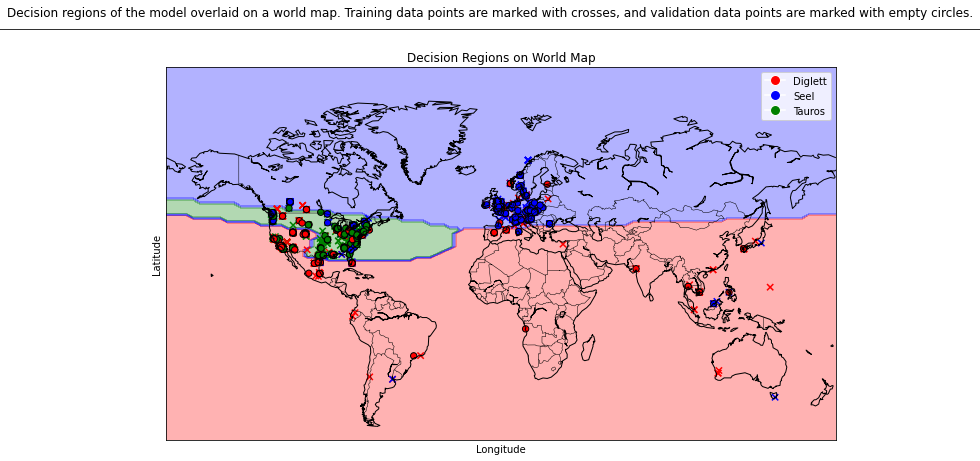

In [308]:
def plot_decision_region_on_map(model: nn.Module, x_train, y_train, x_val, y_val):
    """
    Plot the decision region of the model overlaid on a world map.

    Args:
    model: nn.Module: The trained model
    x_train: The training features
    y_train: The training labels
    x_val: The validation features
    y_val: The validation labels
    """
    model.eval()

    # Define the range of the grid
    x_min, x_max = -180, 180
    y_min, y_max = -60, 90
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100, dtype=np.float32), 
                         np.linspace(y_min, y_max, 100, dtype=np.float32))

    # Flatten the grid to pass it through the model
    grid_points = np.c_[yy.ravel(), xx.ravel()]
    
    grid_preds = predict(model,grid_points)
    grid_preds = grid_preds.reshape(xx.shape)
    
    # Create the world map
    fig, ax = plt.subplots(figsize=(12, 8))
    m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=ax)
    m.drawcoastlines()
    m.drawcountries()
    
    # Convert grid coordinates to map projection
    x_map, y_map = m(xx, yy)
    
    # Colors
    colors = {0: 'red', 1: 'blue', 2: 'green'}
    class_labels = sorted(colors.keys())
    cmap = mcolors.ListedColormap([colors[label] for label in class_labels])
    norm = mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5, 2.5], ncolors=len(colors))
    
    # Plot decision boundary
    plt.contourf(x_map, y_map, grid_preds, alpha=0.3, cmap=cmap, norm=norm)
    
    # Add a scatter plot of training data
    x_train_map, y_train_map = m(x_train[:, 1], x_train[:, 0])  # Convert to map projection
    plt.scatter(x_train_map, y_train_map, c=[colors[label] for label in y_train], marker='x', s=40, label='Training Data')
    
    # Add a scatter plot of training data
    x_val_map, y_val_map = m(x_val[:, 1], x_val[:, 0])  # Convert to map projection
    plt.scatter(x_val_map, y_val_map, c=[colors[label] for label in y_val], marker='o',edgecolor='k', facecolor='none', s=40, label='Training Data')
    
    # Add a color legend
    color_map = {0:'Diglett',1: 'Seel', 2:'Tauros'}
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10, label=color_map[label]) for label in class_labels]
    plt.legend(handles=handles, loc='upper right')
    

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Decision Regions on World Map')

    # Add a caption
    plt.figtext(0.5, 0.92, 'Decision regions of the model overlaid on a world map. Training data points are marked with crosses, and validation data points are marked with empty circles.',
                ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
    
    plt.show()
plot_decision_region_on_map(model, X_train, y_train, X_val, y_val)

Do the learned decision regions look like you would expect? Can they be improved? In what sense, and how would that change your model? Please comment on your results. 

**Your answer:** Yes, they look much better than one could fit in a linear case, and they seem to capture (although slightly different) what I put into words before: Tauros mainly in the US, Seels in the nort regions of the map and Digletts in the southern regions. The accuracy is quite good, around 73%, however,  think is hard to fully capture the separation when we mostly have data for Europe and US. We do not really know how are the pokemons appearing in other parts of the world and the model is just generalzing to fit the few observations we have. I think that with more data the model would be better. Besides that, the model seems to generalize well from the training points (crosses) to the validation points (circles)

Finally, as hunter, if you want to capture the 3 pokemons, for now it seems that the US is the place that will maximize the change that you get the three of them. Therefore, if he decided to plan his trip to the US, one could exclude the analysis to only the us and see to which states he should travel.

### 4.1. Model capacity and generalization

Now we have all the neccessary tools to do a small experiment on model capacity and implications on generalization.

Begin by defining a neural network `tiny_model` with a single linear layer and appropriate activation function. Then, train the network until convergence (should be fast).

In [280]:
class TinyNN(nn.Module):
    def __init__(self, input_dim: int, output_dim: int):
        super(TinyNN, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.fc(x)
        x = torch.softmax(x,dim=1)  # Apply ReLU activation function
        return x

# Initialize the tiny model with input dimensions and output dimensions
input_dim = 2 
output_dim = 3  

tiny_model = TinyNN(input_dim, output_dim)
tiny_optimizer = optim.Adam(tiny_model.parameters(), lr=0.001)

# Train the model
train_model(
    model=tiny_model,
    optimizer=tiny_optimizer,
    loss_fn=loss_fn,
    num_epochs=100,
    train_dataloader=loader_train,
    val_dataloader=loader_val,
    device="cpu"
)

Epoch 0	Train Loss: 1.159 	Validation Loss: 1.174	Train Accuracy: 21.05	Validation Accuracy: 20.57
Epoch 5	Train Loss: 1.148 	Validation Loss: 1.162	Train Accuracy: 24.10	Validation Accuracy: 23.24
Epoch 10	Train Loss: 1.137 	Validation Loss: 1.151	Train Accuracy: 26.11	Validation Accuracy: 23.62
Epoch 15	Train Loss: 1.126 	Validation Loss: 1.138	Train Accuracy: 27.86	Validation Accuracy: 24.76
Epoch 20	Train Loss: 1.114 	Validation Loss: 1.125	Train Accuracy: 31.70	Validation Accuracy: 26.86
Epoch 25	Train Loss: 1.101 	Validation Loss: 1.110	Train Accuracy: 33.28	Validation Accuracy: 28.76
Epoch 30	Train Loss: 1.088 	Validation Loss: 1.095	Train Accuracy: 34.85	Validation Accuracy: 32.95
Epoch 35	Train Loss: 1.075 	Validation Loss: 1.080	Train Accuracy: 36.86	Validation Accuracy: 36.38
Epoch 40	Train Loss: 1.063 	Validation Loss: 1.066	Train Accuracy: 47.07	Validation Accuracy: 49.33
Epoch 45	Train Loss: 1.052 	Validation Loss: 1.054	Train Accuracy: 53.97	Validation Accuracy: 54.48
Ep

In [281]:
assert isinstance(tiny_model, nn.Module), "tiny_model should be a torch.nn.Module"
test_model_output_shape(tiny_model)

Now, draw the decision regions of the network as you did in the previous section. Before running the code, think about what you expect to see. What will the regions look like? How will they differ from the previous ones?

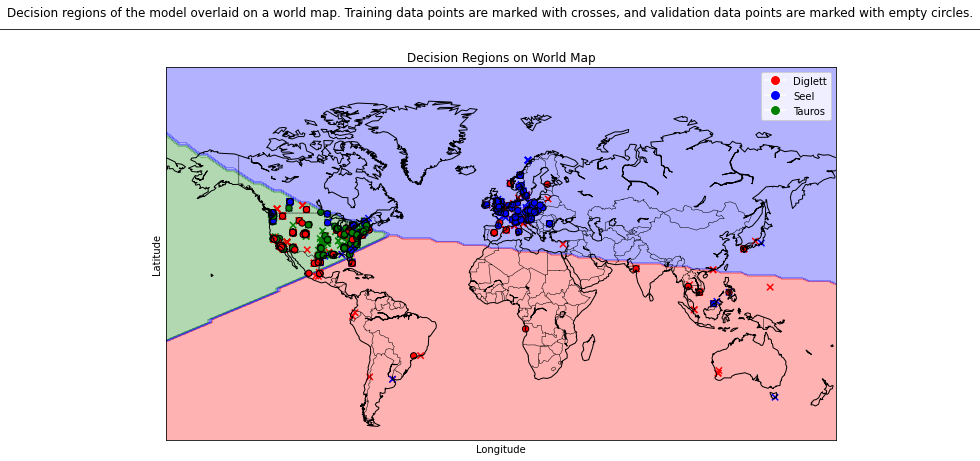

In [285]:
plot_decision_region_on_map(tiny_model, X_train, y_train, X_val, y_val)

Are the decision regions any different? Why/why not? What does this tell you about the model capacity and generalization?

**Your answer:** The regions are quite similar overall and they seem to reach the same conclusions. In this case it is more simple, and for example instead of splitting the US in green and red it is predicting the entire continent as green, which makes the model a bit worse if one want specific regions, but equally good for the general conclusion about continents.

Next, create a neural network `large_model` with many layers and/or hidden units. Try to maximize the training accuracy (0.7-0.8). Getting these models to converge might be a bit tricky, so you might have to adjust the learning rate, the optimizer, etc. Also, might be easier to have a wide model (large number of hidden units, say 1024 per layer) than a deep model (more than 4 layers).

Feel free to experiment, but if you get stuck, our model is a MLP with an input layer, 4 hidden layers with 1024 units each, and an output layer. We used the ReLU activation function between each layer and a softmax for the output layer. We used the Adam optimizer with a learning rate of 0.003 and a batch size of 512. We trained for at least a few hundred epochs. Also, normalizing the input can be helpful (zero mean and unit variance).

In [288]:
# Define a large feed-forward neural network with multiple hidden layers
class LargeNN(nn.Module):
    def __init__(self, input_dim: int, output_dim: int):
        super(LargeNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        x = F.softmax(x, dim=1)  # Apply softmax to the output layer
        return x

# Initialize the large model with input dimensions and output dimensions
input_dim = 2  # Example input feature dimension
output_dim = 3  # Example number of classes

large_model = LargeNN(input_dim, output_dim)
large_optimizer = optim.Adam(large_model.parameters(), lr=0.001)

# Train the model
train_model(
    model=large_model,
    optimizer=large_optimizer,
    loss_fn=loss_fn,
    num_epochs=100,
    train_dataloader=loader_train,
    val_dataloader=loader_val,
    device="cpu"
)

Epoch 0	Train Loss: 0.985 	Validation Loss: 0.898	Train Accuracy: 55.46	Validation Accuracy: 61.33
Epoch 5	Train Loss: 0.847 	Validation Loss: 0.805	Train Accuracy: 70.39	Validation Accuracy: 69.90
Epoch 10	Train Loss: 0.848 	Validation Loss: 0.785	Train Accuracy: 70.22	Validation Accuracy: 71.05
Epoch 15	Train Loss: 0.888 	Validation Loss: 0.889	Train Accuracy: 66.55	Validation Accuracy: 60.57
Epoch 20	Train Loss: 0.830 	Validation Loss: 0.773	Train Accuracy: 72.05	Validation Accuracy: 72.95
Epoch 25	Train Loss: 0.826 	Validation Loss: 0.775	Train Accuracy: 72.58	Validation Accuracy: 72.76
Epoch 30	Train Loss: 0.827 	Validation Loss: 0.773	Train Accuracy: 72.49	Validation Accuracy: 72.95
Epoch 35	Train Loss: 0.837 	Validation Loss: 0.781	Train Accuracy: 71.44	Validation Accuracy: 71.81
Epoch 40	Train Loss: 0.997 	Validation Loss: 0.997	Train Accuracy: 55.37	Validation Accuracy: 54.10
Epoch 45	Train Loss: 0.999 	Validation Loss: 0.991	Train Accuracy: 55.28	Validation Accuracy: 54.86
Ep

In [289]:
assert isinstance(large_model, nn.Module), "large_model should be a torch.nn.Module"
test_model_output_shape(large_model)

Again, draw the decision regions of the network. What do you expect to see now? How will the regions differ from the previous ones?

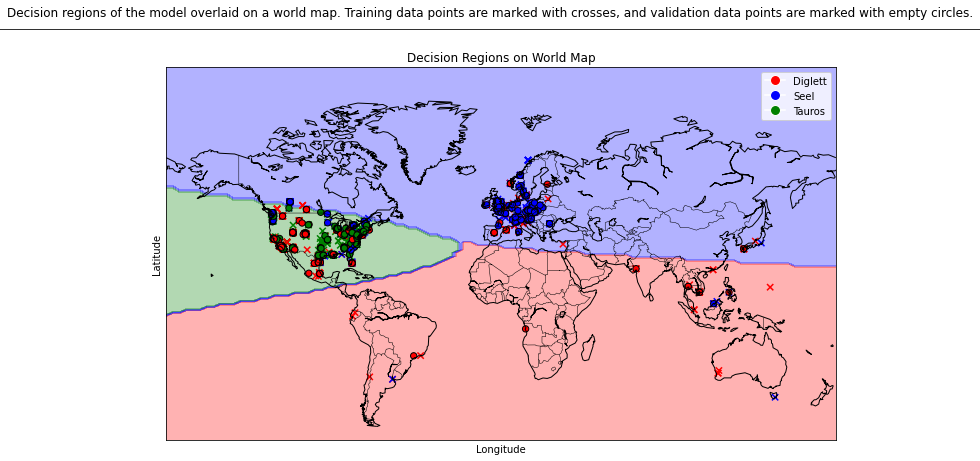

In [290]:
plot_decision_region_on_map(large_model, X_train, y_train, X_val, y_val)

How do the decision regions differ between the tiny, large and the network you trained? Can you explain why this happens? Relate your answer to the concepts you learned in the first lectures.

**Your answer:** In this case the models seems to generalize worse. Again, the general conclusion about continents is the same, but when checking specific regions it depends on the model. Sometimes it makes roughly the same splits than the tiny model but sometimes makes overfitted split in other parts of the world. This means that one should increase the number of epochs, but the model is much slower. On top of that, it seems to capture worse the validation points (circles) than the training points(crosses), suggesting an overfit.

## 5. Evaluation

Back to your original model. Once you achieved at least 60% accuracy in the validation set with your main model, we are done with its training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [293]:
main_model_test_accuracy = 0

pred=predict(model,X_test)
y=torch.tensor(y_test)
correct=(pred==y).sum().item()
main_model_test_accuracy=correct/len(y)
print(f"Test accuracy: {main_model_test_accuracy:.3f}.")

Test accuracy: 0.736.


In [294]:
assert main_model_test_accuracy > 0.6

Most likely, you'll get a different (slightly worse) accuracy than the one you got on the validation set. Why is this? Also, why do we need both a test and validation set?

**Your answer:** In my case I got a slightly better accuracy (73% compared to 72%). I think this is because the test is relatively small and I was lucky in my train test splits, training some of the outliers/harder points and leaving the more general cases in the test (as many of the outliers are only present once, one can only put them in train or test). In general one would expect the test accuracy to be worse, as you train the data looking into the validation set, and "if you do not like the accuracy on the validation points" you keep trainning until you get a better result. However in the test set you should only use it once with completely new unseen data. We need both validaiton and test because we want to know how well does the model generalize if we decided to apply on a real world scenario (new data).

Next, compute the confusion matrix of your predictions on the test set and save it as `conf_mat`.

In [299]:
preds_np = pred.cpu().numpy()
labels_np = y.cpu().numpy()
    
# Compute confusion matrix
conf_mat = confusion_matrix(labels_np, preds_np)
print(conf_mat)

[[100  19  24]
 [ 12  89  36]
 [ 17   1 115]]


In [300]:
assert isinstance(conf_mat, np.ndarray) or isinstance(
    conf_mat, torch.Tensor
), "conf_mat should be a numpy array or torch.Tensor"
assert conf_mat.shape == (3, 3), "conf_mat should have shape (3, 3), i.e. 3 classes"
assert np.sum(conf_mat) == len(
    dataset_test
), "conf_mat should sum up to the number of test samples"

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** The model tends to confuse all the classes similarly.

Class 1-2: 19+12=31
Class 1-3: 17+24=41
Class 2-3: 36+1=37

It also seems to predict the classes with similar accuracy, being lower for Class 3 (Tauros)

Class 1: (100)/(100+17+12)= 77%
Class 2: (89)/(89+19+1)= 81%
Class 3: (115)/(115+36+24)= 65%

This is becuase, as I already said, most Tauros are in the US but there are also much more appearances of the other pokemons, making it more likely that one makes a mistake when he guesses Tauro in the most part of the continent.

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** As I mentioned before, a persone intereseted in capturing all the pokemons should travel to a region wehre he can find the three pokemons, that is, in the limit of the three regions. In the three models I tested, the limit of these regions corresponds to the middle of the see, which is not the best place to travel. Ideally, one would tune the model to predict only on land and decide using that model. Hoever, plotting the decision regions one can see from visual inspection that the most feasible place to travel, as he would be able to find the three pokemons within the same country.

Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** I think in the case we are exploring one could improve the model selecting also the time of the year, to see if he would like to travel better on one month or another. A part from that I think that there is not much things that we can add to cahnge the decision, as the US looks like the only viable option, if any. However, it is still worth it to explore different features that can help to explore how pokemons relate to other features like time of the day, weather, day of the week, terran type, pressure, closest gym location, etc. Any of this features can be useful to help the pokemon hunter to move once he is in the US. In my case, I am going to explore time of the day, day of the week and type of terrain.

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

In [315]:
df = pd.read_csv('300k.csv')
df["name"] = df["class"].apply(lambda x: name_dict[x])

C:\Users\danie\AppData\Local\Temp\ipykernel_14320\3392170586.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('300k.csv')


Index(['pokemonId', 'latitude', 'longitude', 'appearedLocalTime', '_id',
       'cellId_90m', 'cellId_180m', 'cellId_370m', 'cellId_730m',
       'cellId_1460m',
       ...
       'cooc_144', 'cooc_145', 'cooc_146', 'cooc_147', 'cooc_148', 'cooc_149',
       'cooc_150', 'cooc_151', 'class', 'name'],
      dtype='object', length=209)


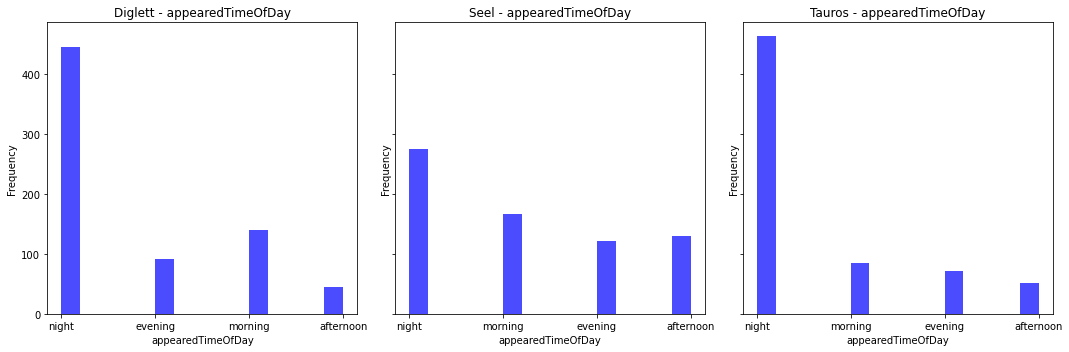

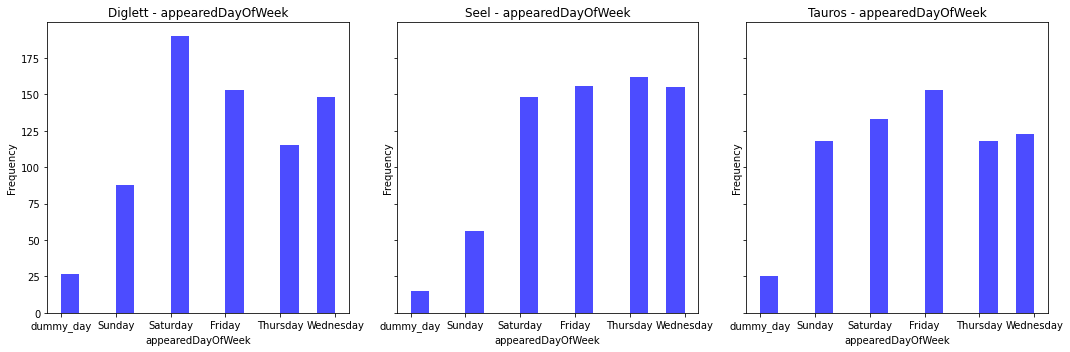

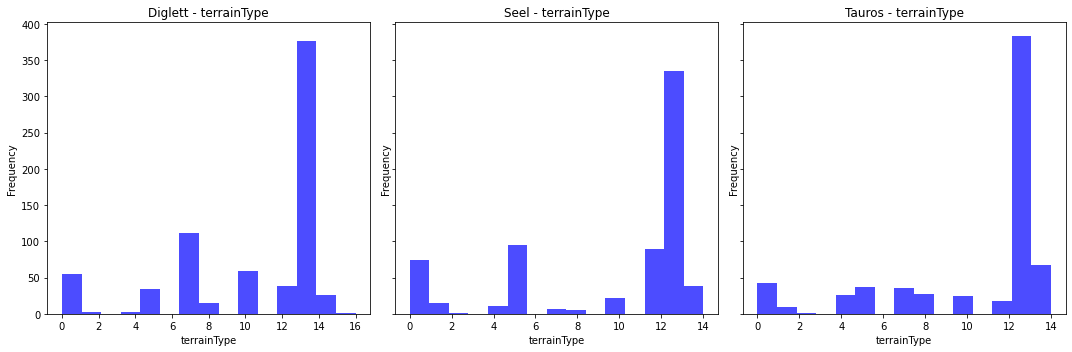

In [331]:
filter_values = ['Diglett', 'Seel', 'Tauros']
filtered_df = df[df['name'].isin(filter_values)]
print(filtered_df.columns)
def plot_hist(data, feature):
    """
    Plot 3 histograms of a specified feature for each value in the 'name' column.

    Args:
    data (pd.DataFrame): The dataset containing the feature and 'name' column
    feature (str): The name of the feature/column to plot the histogram for
    """
    # List of names to filter
    names = ['Diglett', 'Seel', 'Tauros']

    # Create the figure and axes for 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    # Plot histograms for each name
    for i, name in enumerate(names):
        subset = data[data['name'] == name]  # Filter data by 'name'
        axes[i].hist(subset[feature], bins=15, color='blue', alpha=0.7)
        axes[i].set_title(f'{name} - {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    
plot_hist(filtered_df,"appearedTimeOfDay")
plot_hist(filtered_df,"appearedDayOfWeek")
plot_hist(filtered_df,"terrainType")

What does/do this/these histogram(s) show you? Could it be beneficial to add this/these new feature(s) as input? Explain why/why not.

**Your answer:** The conclusion of these histograms is that Digglets are more likely to appear on a Sturday night, Seels on a Thursday night and Tauros on a Friday night. Most of them are still likely to appear other days but a good strategy would be to look for one every night day. The 3 pokemons are most likely to appear at night and in a terrain of type 13, which is meaning is a type of terrain (like cave, lake, etc) but its not publicly available.

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not expect very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** 
Approaching the problem as a regression instead of classification has both pros and cons:

Pros:

- Continuous Output: Regression provides continuous outputs, allowing for more precise localization of specific Pokémon, which might be more useful if we are looking for their exact positions or characteristics.

- Flexibility: Instead of being limited to predefined classes, regression allows for a flexible prediction of values such as probabilities or coordinates that are more granular than class labels.


Cons:

- Loss of Categorization: Regression loses the simplicity of classification, where discrete classes clearly define categories like specific Pokémon.
- More Complex Error Interpretation: Interpreting errors in regression is more complex, as you need to assess the magnitude of differences, whereas classification simply measures correct vs incorrect predictions.

While regression can improve precision, classification remains simpler and effective when looking to categorize Pokémon rather than pinpoint exact values.

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [ ]:
# YOUR CODE HERE